In [457]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [458]:
import torch
import torch.nn as nn

In [459]:
companies = ['MSFT.csv', 'FB.csv', 'DKNG.csv'] 
df = pd.read_csv(companies[2])

In [460]:
data = df['Close'].values

In [461]:
T = 15
X = []
Y = []

for t in range(len(data)- 2 * T):
    x = data[t:t+T]
    X.append(x)
    y = data[t+T: t+T*2]
    Y.append(y)

In [462]:
class ANN(nn.Module):
    def __init__(self, input_no, output_no, hidden_layers):
        super().__init__()
        layers = []
        
        no_in = input_no
        for h in hidden_layers:
            layers.append(nn.Linear(no_in, h))
            layers.append(nn.ReLU(inplace=True))
            layers.append(nn.Dropout(.3))
            no_in = h
            
        layers.append(nn.Linear(hidden_layers[-1], output_no))
        self.layer = nn.Sequential(*layers)
    def forward(self,X):
        out = self.layer(X)
        return out

In [463]:
model = ANN(T, T, [10000])

In [464]:
model

ANN(
  (layer): Sequential(
    (0): Linear(in_features=15, out_features=10000, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=10000, out_features=15, bias=True)
  )
)

In [465]:
train_count = int(len(X) * 0.005)
X_train = torch.tensor(X[:-1], dtype=torch.float)
y_train =torch.tensor(Y[:-1], dtype=torch.float)
X_test = torch.tensor(X[-1:], dtype=torch.float)
y_test = torch.tensor(Y[-1:], dtype=torch.float)

In [466]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.002)

In [467]:
epochs = 70
losses = []
test_losses = []
for epoch in range(epochs):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    test_loss = criterion(model(X_test),y_test)
    test_losses.append(test_loss)
    print(f'Epoch [{epoch+1}/{epochs}]. Loss : {loss.item()}. Test Loss : {test_loss.item()}')

Epoch [1/70]. Loss : 540.3467407226562. Test Loss : 15752.51171875
Epoch [2/70]. Loss : 6233.15185546875. Test Loss : 1406.563720703125
Epoch [3/70]. Loss : 640.0948486328125. Test Loss : 2828.95703125
Epoch [4/70]. Loss : 877.0830688476562. Test Loss : 9071.884765625
Epoch [5/70]. Loss : 2748.578369140625. Test Loss : 6890.19970703125
Epoch [6/70]. Loss : 2175.368408203125. Test Loss : 2388.40625
Epoch [7/70]. Loss : 685.2758178710938. Test Loss : 118.95796203613281
Epoch [8/70]. Loss : 28.926210403442383. Test Loss : 1036.3189697265625
Epoch [9/70]. Loss : 420.2896728515625. Test Loss : 2589.930908203125
Epoch [10/70]. Loss : 1036.44287109375. Test Loss : 2655.01953125
Epoch [11/70]. Loss : 1138.5589599609375. Test Loss : 1753.775390625
Epoch [12/70]. Loss : 755.0613403320312. Test Loss : 591.0833740234375
Epoch [13/70]. Loss : 273.59039306640625. Test Loss : 51.059776306152344
Epoch [14/70]. Loss : 37.519378662109375. Test Loss : 380.4252014160156
Epoch [15/70]. Loss : 96.8718490600

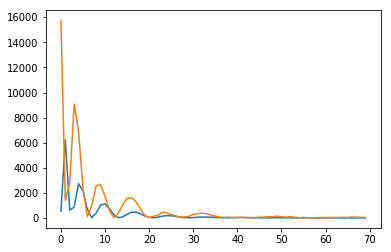

In [468]:
plt.plot(range(epochs), losses)
plt.plot(range(epochs), test_losses)

In [469]:
y_pred = model(X_test)
loss = criterion(y_pred, y_test)
print(loss)

tensor(37.9595, grad_fn=<MseLossBackward>)


In [470]:
X_test[-1].reshape(1,-1)

tensor([[34.0900, 31.6100, 32.0400, 33.7400, 36.0500, 33.9100, 34.6800, 37.2100,
         36.2700, 36.3200, 35.1500, 35.8100, 39.0600, 38.8600, 39.0600]])

In [471]:
pred = model(X_test[-1].reshape(1,-1))

In [472]:
pred = pred.reshape(-1).detach()

In [473]:
pred

tensor([37.6373, 37.2648, 36.7536, 41.3938, 43.2507, 44.1545, 41.8457, 37.6722,
        44.5066, 36.4121, 38.4061, 41.3250, 43.8471, 36.4369, 45.1129])

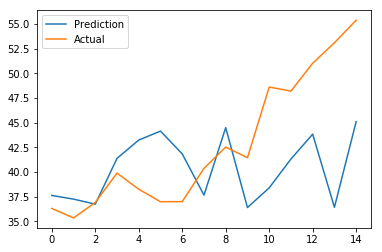

In [474]:
plt.plot(pred, label="Prediction")
plt.plot(y_test[-1], label="Actual")
plt.legend()

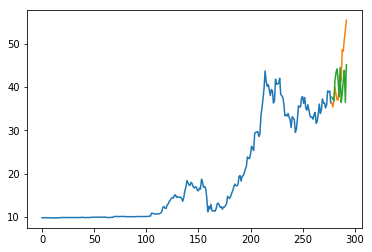

In [475]:
plt.plot(data[:-T])
plt.plot(np.arange(T)+len(data[:-T]),Y[-1], label="Actual")
plt.plot(np.arange(T)+len(data[:-T]),pred, label="Prediction")
#plt.legend()

In [476]:
X[-1]

array([34.09    , 31.610001, 32.040001, 33.740002, 36.049999, 33.91    ,
       34.68    , 37.209999, 36.27    , 36.32    , 35.150002, 35.810001,
       39.060001, 38.860001, 39.060001])